In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler


# Step 2: Load and Prepare the Training Data


In [3]:
# Load the training dataset
train_data = pd.read_csv('merged_cleaned_train_flight_weather_data.csv')  # Replace with your actual path

# Binary Classification Target
train_data['delay_binary'] = np.where(train_data['departure.delay_minutes'] > 0, 'delayed', 'on-time')

# Multi-Class Classification Target
def categorize_delay(minutes):
    if minutes == 0:
        return 'No Delay'
    elif 0 < minutes < 45:
        return 'Short Delay'
    elif 45 <= minutes <= 175:
        return 'Moderate Delay'
    else:
        return 'Long Delay'

train_data['delay_category'] = train_data['departure.delay_minutes'].apply(categorize_delay)

# Regression Target
y_regression = train_data['departure.delay_minutes']

# Feature Columns for All Tasks
feature_cols = ['Departure_Hour', 'Temperature (°F) Avg', 'Wind Speed (mph) Avg', 
               'Precipitation (in) Total', 'Humidity (%) Avg', 'Pressure (in) Avg']

# Include encoded categorical features
day_of_week_cols = [col for col in train_data.columns if 'Departure_DayOfWeek_' in col]
feature_cols += day_of_week_cols

# Include airline encoded features if applicable
airline_encoded_cols = [col for col in train_data.columns if 'airline.name_' in col]
feature_cols += airline_encoded_cols

# Define X and y for Classification Tasks
X_classification = train_data[feature_cols]

# Define y for Binary Classification
y_binary = train_data['delay_binary']

# Define y for Multi-Class Classification
y_multiclass = train_data['delay_category']


# Step 3: Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

# Binary Classification Split
X_train_binary, X_val_binary, y_train_binary, y_val_binary = train_test_split(
    X_classification, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Multi-Class Classification Split
X_train_multiclass, X_val_multiclass, y_train_multiclass, y_val_multiclass = train_test_split(
    X_classification, y_multiclass, test_size=0.2, random_state=42, stratify=y_multiclass
)

# Regression Split
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(
    X_classification, y_regression, test_size=0.3, random_state=42
)


# Step 4: Fit and Save Scalers

In [8]:
# Initialize scalers
scaler_binary = StandardScaler()
scaler_multiclass = StandardScaler()
scaler_regression = StandardScaler()

# Fit scalers on respective training data
X_train_binary_scaled = scaler_binary.fit_transform(X_train_binary)
X_train_multiclass_scaled = scaler_multiclass.fit_transform(X_train_multiclass)
X_train_reg_scaled = scaler_regression.fit_transform(X_train_reg)

# Save the scalers for future use
joblib.dump(scaler_binary, 'scaler_binary.pkl')
print("Scaler for Binary Classification saved as 'scaler_binary.pkl'.")

joblib.dump(scaler_multiclass, 'scaler_multiclass.pkl')
print("Scaler for Multi-Class Classification saved as 'scaler_multiclass.pkl'.")

joblib.dump(scaler_regression, 'scaler_regression.pkl')
print("Scaler for Regression saved as 'scaler_regression.pkl'.")


Scaler for Binary Classification saved as 'scaler_binary.pkl'.
Scaler for Multi-Class Classification saved as 'scaler_multiclass.pkl'.
Scaler for Regression saved as 'scaler_regression.pkl'.


# 2. Model Training and Evaluation
# 2.1. Binary Classification

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_classifier.fit(X_train_binary_scaled, y_train_binary)

print(rf_classifier)


RandomForestClassifier(n_estimators=200, random_state=42)


# Step 3: Model Evaluation



C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Random Forest Classifier Performance:
Accuracy: 0.61
Precision: 0.64
Recall: 0.89
F1-Score: 0.75

Classification Report:
              precision    recall  f1-score   support

     delayed       0.64      0.89      0.75      6684
     on-time       0.32      0.09      0.14      3691

    accuracy                           0.61     10375
   macro avg       0.48      0.49      0.45     10375
weighted avg       0.53      0.61      0.53     10375



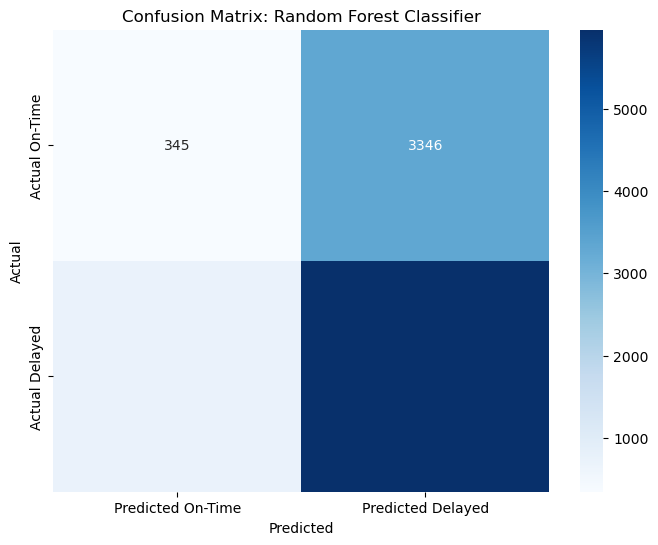

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred_binary = rf_classifier.predict(X_val_binary)

# Calculate metrics
accuracy = accuracy_score(y_val_binary, y_pred_binary)
precision = precision_score(y_val_binary, y_pred_binary, pos_label='delayed')
recall = recall_score(y_val_binary, y_pred_binary, pos_label='delayed')
f1 = f1_score(y_val_binary, y_pred_binary, pos_label='delayed')

print(f"Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}\n")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_val_binary, y_pred_binary))

# Confusion Matrix
cm = confusion_matrix(y_val_binary, y_pred_binary, labels=['on-time', 'delayed'])
cm_df = pd.DataFrame(cm, index=['Actual On-Time', 'Actual Delayed'], columns=['Predicted On-Time', 'Predicted Delayed'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# 2.2. Multi-Class Classification
# Step 1: Train the Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_multiclass = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_multiclass.fit(X_train_multiclass_scaled, y_train_multiclass)

print(rf_multiclass)
#X_val_multiclass

RandomForestClassifier(random_state=42)


# Step 2: Model Evaluation


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr

Random Forest Classifier Performance:
Accuracy: 0.30
Precision (Weighted): 0.35
Recall (Weighted): 0.30
F1-Score (Weighted): 0.25

Classification Report:


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    Long Delay       0.00      0.00      0.00      1126
Moderate Delay       0.00      0.00      0.00       625
      No Delay       0.26      0.78      0.39      2793
   Short Delay       0.49      0.17      0.25      5831

      accuracy                           0.30     10375
     macro avg       0.19      0.24      0.16     10375
  weighted avg       0.35      0.30      0.25     10375



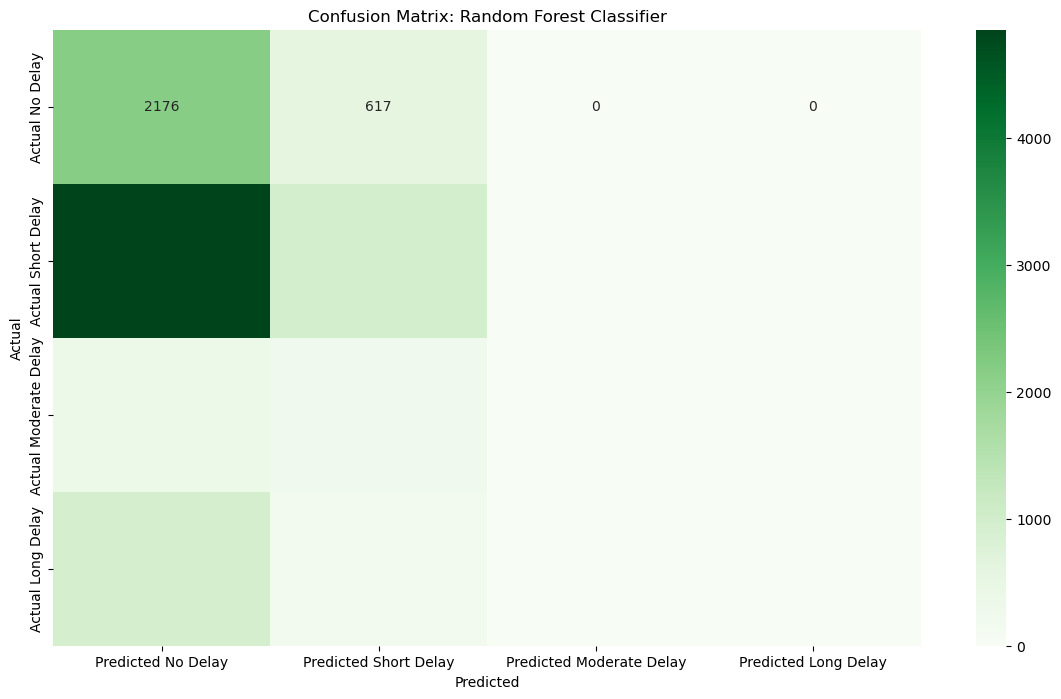

In [49]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred_multiclass = rf_multiclass.predict(X_val_multiclass)

# Calculate metrics
accuracy = accuracy_score(y_val_multiclass, y_pred_multiclass)
precision, recall, f1, _ = precision_recall_fscore_support(y_val_multiclass, y_pred_multiclass, average='weighted')

print(f"Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1-Score (Weighted): {f1:.2f}\n")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_val_multiclass, y_pred_multiclass))

# Confusion Matrix
cm = confusion_matrix(y_val_multiclass, y_pred_multiclass, labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
cm_df = pd.DataFrame(cm, index=['Actual No Delay', 'Actual Short Delay', 'Actual Moderate Delay', 'Actual Long Delay'],
                     columns=['Predicted No Delay', 'Predicted Short Delay', 'Predicted Moderate Delay', 'Predicted Long Delay'])

plt.figure(figsize=(14,8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# 2.3. Regression Analysis
# Step 1: Train the Model

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train_reg_scaled, y_train_reg)

print(rf_regressor)


RandomForestRegressor(random_state=42)


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred_reg = rf_regressor.predict(X_val_reg)

# Calculate metrics
mae = mean_absolute_error(y_val_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_val_reg, y_pred_reg))
r2 = r2_score(y_val_reg, y_pred_reg)

print(f"Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f"R² Score: {r2:.2f}")


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 24.01 minutes
Root Mean Squared Error (RMSE): 65.51 minutes
R² Score: -0.01


# Cross-Validation:

In [59]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_mae = cross_val_score(rf_regressor, X_classification, y_regression, cv=5, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(rf_regressor, X_classification, y_regression, cv=5, scoring='neg_root_mean_squared_error')

print(f"Cross-Validation MAE: {-cv_mae.mean():.2f} ± {cv_mae.std():.2f} minutes")
print(f"Cross-Validation RMSE: {-cv_rmse.mean():.2f} ± {cv_rmse.std():.2f} minutes")


Cross-Validation MAE: 29.92 ± 4.35 minutes
Cross-Validation RMSE: 72.31 ± 10.88 minutes


# Feature Importance Analysis:


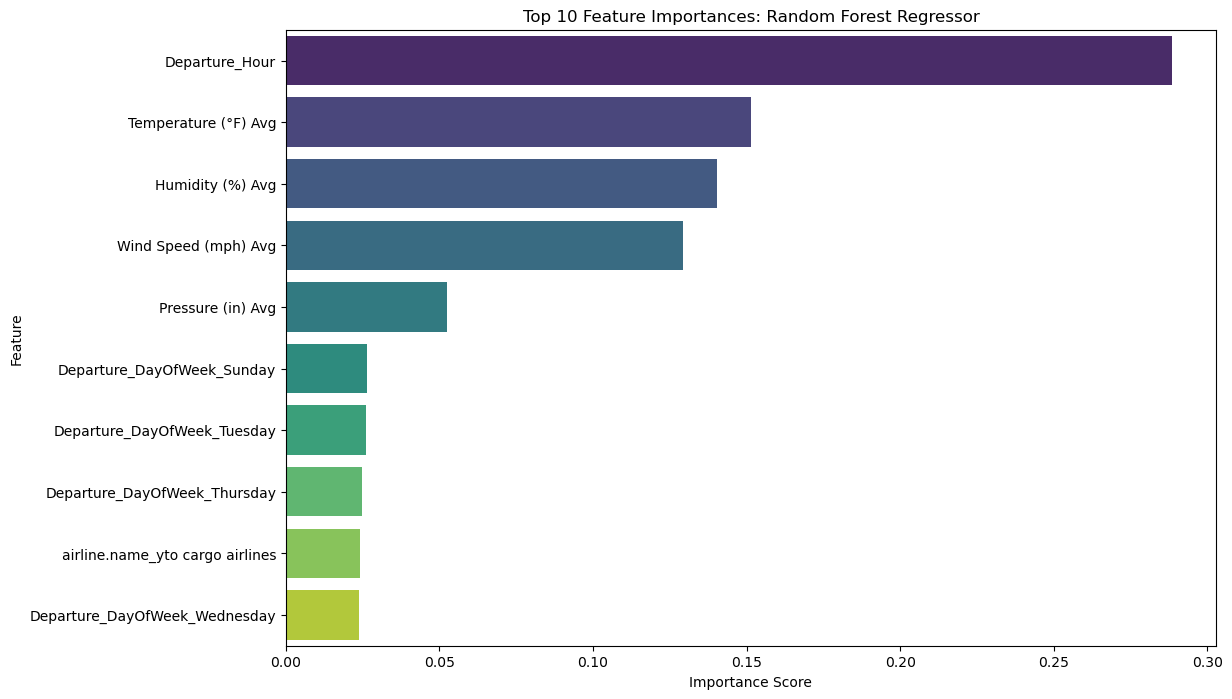

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_regressor.feature_importances_
feature_names = X_classification.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances: Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


# 3. Phase 4: Model Optimization and Evaluation
# 3.1. Hyperparameter Tuning with GridSearchCV
Optimizing your models can significantly enhance their performance. We'll perform Grid Search to find the best hyperparameters for each model.

# 3.1.1. Binary Classification: Random Forest Classifier

In [79]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_binary = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize Grid Search
grid_search_binary = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_binary,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1_macro'  # Focus on F1-Score for balanced performance
)

# Perform Grid Search
grid_search_binary.fit(X_train_binary_scaled, y_train_binary)

# Best parameters
print("Best Parameters (Binary Classification):", grid_search_binary.best_params_)

# Best estimator
best_rf_classifier = grid_search_binary.best_estimator_


Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters (Binary Classification): {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


# 3.1.2. Multi-Class Classification: Random Forest Classifier



In [86]:
# Define the parameter grid
param_grid_multiclass = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize Grid Search
grid_search_multiclass = GridSearchCV(
    estimator=rf_multiclass,
    param_grid=param_grid_multiclass,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1_macro'
)

# Perform Grid Search
grid_search_multiclass.fit(X_train_multiclass_scaled, y_train_multiclass)

# Best parameters
print("Best Parameters (Multi-Class Classification):", grid_search_multiclass.best_params_)

# Best estimator
best_rf_multiclass = grid_search_multiclass.best_estimator_


Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters (Multi-Class Classification): {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# 4.Validation with k-Fold Cross-Validation
Ensuring that your models generalize well to unseen data is crucial. We'll perform 5-fold cross-validation for each model.

# 4.1. Binary Classification

In [91]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_binary = cross_val_score(best_rf_classifier, X_train_binary_scaled, y_train_binary, cv=5, scoring='f1_macro')

print(f"Binary Classification - Cross-Validation F1-Score: {cv_scores_binary.mean():.2f} ± {cv_scores_binary.std():.2f}")


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

Binary Classification - Cross-Validation F1-Score: 0.65 ± 0.00


# 4.2. Multi-Class Classification

In [96]:
# Perform 5-fold cross-validation
cv_scores_multiclass = cross_val_score(best_rf_multiclass, X_train_multiclass_scaled, y_train_multiclass, cv=5, scoring='f1_macro')

print(f"Multi-Class Classification - Cross-Validation F1-Score: {cv_scores_multiclass.mean():.2f} ± {cv_scores_multiclass.std():.2f}")


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

Multi-Class Classification - Cross-Validation F1-Score: 0.37 ± 0.01


# 4.3. Regression

In [125]:
# Define the parameter grid
param_grid_reg = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}



# Initialize Grid Search
grid_search_reg = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid_reg,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1_macro'  # Optimize for MAE
)

# Perform Grid Search
#grid_search_reg.fit(X_train, y_train)
# Perform Grid Search
grid_search_reg.fit(X_train_reg_scaled, y_train_reg)


# Best parameters
print("Best Parameters (Regression):", grid_search_reg.best_params_)

# Best estimator
best_rf_regressor = grid_search_reg.best_estimator_


Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters (Regression): {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [127]:
# Perform 5-fold cross-validation
cv_scores_regression = cross_val_score(best_rf_regressor, X_train_reg_scaled, y_train_reg, cv=5, scoring='neg_mean_absolute_error')

print(f"Regression - Cross-Validation MAE: {-cv_scores_regression.mean():.2f} ± {cv_scores_regression.std():.2f} minutes")


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomF

Regression - Cross-Validation MAE: 27.92 ± 0.38 minutes


# 5. Model Comparison
Comparing different models helps in selecting the ultimate model with the best performance.

# 5.1. Binary Classification: Comparing Random Forest with Logistic Regression

In [ ]:
X_val_binary

In [103]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
lr = LogisticRegression(max_iter=20000, random_state=42)

# Train Logistic Regression
lr.fit(X_train_binary_scaled, y_train_binary)

# Make predictions
y_pred_lr = lr.predict(X_val_binary)

# Calculate F1-Score
f1_lr = f1_score(y_val_binary, y_pred_lr, pos_label='delayed')

print(f"Logistic Regression F1-Score: {f1_lr:.2f}")

# Compare with Random Forest
f1_rf = f1_score(y_val_binary, y_pred_binary, pos_label='delayed')
print(f"Random Forest Classifier F1-Score: {f1_rf:.2f}")


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Logistic Regression F1-Score: 0.00
Random Forest Classifier F1-Score: 0.75


# 5.2. Multi-Class Classification: Comparing Random Forest with Other Models
(You can repeat similar steps for other models like Decision Trees, SVMs, etc.)

# 5.3. Regression: Comparing Random Forest with Other Regressors
(You can train and evaluate other regression models like Linear Regression, SVR, etc., and compare their MAE and RMSE scores.)



# 6. Phase 5: Model Testing and Submission
Now that your models are optimized and evaluated, we'll proceed to make predictions on the test dataset and prepare the submission files.

# 6.1. Prerequisites
Ensure you have the following files in your working directory:

# Trained Models:

best_rf_classifier.pkl
best_rf_multiclass.pkl
best_rf_regressor.pkl
Scalers:

scaler_binary.pkl
scaler_multiclass.pkl
scaler_regression.pkl

# Test Datasets:

cleaned_test_data_no_delay.csv: Preprocessed test dataset without the target variable.
original_test_data.csv: Original test dataset containing all required columns for submission.
# 6.2. Making Predictions
We Will perform predictions for:

Binary Classification: Predict if a flight is on-time or delayed.
Multi-Class Classification: Categorize flights into No Delay, Short Delay, Moderate Delay, or Long Delay.
Regression: Predict the exact delay duration in minutes.
# 6.2.1. Binary Classification Prediction
Step 1: Import Necessary Libraries
(Assuming libraries are already imported)

# Step 2: Load the Test Datasets

In [106]:
# Load the cleaned test dataset without 'departure.delay_minutes'
test_data_cleaned_binary = pd.read_csv('merged_cleaned_test_flight_weather_data.csv')  # Replace with your actual path

# Load the original test dataset for additional columns required in submission
#original_test_data_binary = pd.read_csv('original_test_data.csv')  # Replace with your actual path


# Step 3: Feature Engineering

In [136]:
# Convert 'departure.scheduledTime' to datetime
test_data_cleaned_binary['departure.scheduledTime'] = pd.to_datetime(test_data_cleaned_binary['departure.scheduledTime'], errors='coerce')

# Extract day of the week
test_data_cleaned_binary['Departure_DayOfWeek'] = test_data_cleaned_binary['departure.scheduledTime'].dt.day_name()

# Extract hour of the day
test_data_cleaned_binary['Departure_Hour'] = test_data_cleaned_binary['departure.scheduledTime'].dt.hour


# Step 4: One-Hot Encoding


In [138]:
# Encode 'status' column if it's categorical
if test_data_cleaned_binary['status'].dtype == 'object' or test_data_cleaned_binary['status'].dtype.name == 'category':
    test_data_cleaned_binary['status'] = test_data_cleaned_binary['status'].astype('category').cat.codes

# One-Hot Encode 'Departure_DayOfWeek'
test_data_cleaned_binary = pd.get_dummies(test_data_cleaned_binary, columns=['Departure_DayOfWeek'], drop_first=True)

# One-Hot Encode 'airline.name' if it exists
if 'airline.name' in test_data_cleaned_binary.columns:
    test_data_cleaned_binary = pd.get_dummies(test_data_cleaned_binary, columns=['airline.name'], drop_first=True)


# Step 5: Align Feature Columns
# Ensure that the test dataset has the same feature columns as the training dataset.

In [140]:
# Define feature columns used in the binary classification model
feature_cols_binary = ['Departure_Hour', 'Temperature (°F) Avg', 'Wind Speed (mph) Avg', 
                       'Precipitation (in) Total', 'Humidity (%) Avg', 'Pressure (in) Avg']

# Include encoded categorical features
day_of_week_cols_binary = [col for col in test_data_cleaned_binary.columns if 'Departure_DayOfWeek_' in col]
feature_cols_binary += day_of_week_cols_binary

# Include airline encoded features if applicable
airline_encoded_cols_binary = [col for col in test_data_cleaned_binary.columns if 'airline.name_' in col]
feature_cols_binary += airline_encoded_cols_binary

# Check for missing features and add them with default values
missing_features_binary = set(feature_cols_binary) - set(test_data_cleaned_binary.columns)
if missing_features_binary:
    for feature in missing_features_binary:
        test_data_cleaned_binary[feature] = 0  # Assign a default value, e.g., 0
    print(f"Missing features added to test data for Binary Classification: {missing_features_binary}")

# Select features for prediction
X_test_binary = test_data_cleaned_binary[feature_cols_binary]

# Handle any remaining missing values
X_test_binary = X_test_binary.fillna(0)

# Ensure the order of features matches the training data
X_test_binary = X_test_binary[feature_cols_binary]


# Step 6: Feature Scaling



In [ ]:
# Load the scaler for Binary Classification
scaler_binary = joblib.load('scaler_binary.pkl')  # Ensure this path is correct

# Transform the test data
X_test_binary_scaled = scaler_binary.transform(X_test_binary)


# Step 7: Load the Trained Binary Classification Model and Predict



In [119]:
import joblib

# Save the best Random Forest Classifier for Binary Classification
joblib.dump(best_rf_classifier, 'best_rf_classifier.pkl')
print("Best Random Forest Classifier (Binary) saved as 'best_rf_classifier.pkl'.")

# Save the best Random Forest Classifier for Multi-Class Classification
joblib.dump(best_rf_multiclass, 'best_rf_multiclass.pkl')
print("Best Random Forest Classifier (Multi-Class) saved as 'best_rf_multiclass.pkl'.")

# Save the best Random Forest Regressor
joblib.dump(best_rf_regressor, 'best_rf_regressor.pkl')
print("Best Random Forest Regressor saved as 'best_rf_regressor.pkl'.")


Best Random Forest Classifier (Binary) saved as 'best_rf_classifier.pkl'.
Best Random Forest Classifier (Multi-Class) saved as 'best_rf_multiclass.pkl'.


NameError: name 'best_rf_regressor' is not defined

In [129]:
# Save the best Random Forest Regressor
joblib.dump(best_rf_regressor, 'best_rf_regressor.pkl')
print("Best Random Forest Regressor saved as 'best_rf_regressor.pkl'.")


Best Random Forest Regressor saved as 'best_rf_regressor.pkl'.


# Step 8: Convert Predictions to Required Format


In [148]:
# Ensure predictions are strings as per submission requirements
# If the model predicts numerical labels, map them accordingly
# Here, assuming 'delayed' and 'on-time' are directly predicted

# Verify unique values
print("Unique predictions in Binary Classification:", np.unique(y_pred_binary))


Unique predictions in Binary Classification: ['delayed' 'on-time']


# Step 9: Prepare the Submission File



In [ ]:
# Merge predictions with original test data for required submission columns
submission_binary = original_test_data_binary[['flight.iataNumber', 'Type', 'Status', 
                                             'departure.iataCode', 'departure.icaoCode', 
                                             'departure.scheduledTime', 'arrival.iataCode', 
                                             'arrival.icaoCode', 'arrival.estimatedTime']].copy()

# Add the prediction
submission_binary['Delay'] = y_pred_binary

# Rename columns as per submission format
submission_binary.rename(columns={
    'flight.iataNumber': 'Flight Number',
    'Type': 'Type',
    'Status': 'Status',
    'departure.iataCode': 'Departure IATA Code',
    'departure.icaoCode': 'Departure ICAO Code',
    'departure.scheduledTime': 'Scheduled Time',
    'arrival.iataCode': 'Arrival IATA Code',
    'arrival.icaoCode': 'Arrival ICAO Code',
    'arrival.estimatedTime': 'Arrival Estimated Time',
    'Delay': 'Delay'
}, inplace=True)

# Save to CSV
submission_binary.to_csv('final_submission_binary.csv', index=False)

print("\nBinary Classification Submission file 'final_submission_binary.csv' created successfully.")


# 6.2.2. Multi-Class Classification Prediction
# Step 1: Load the Test Datasets

In [ ]:
# Load the cleaned test dataset without 'departure.delay_minutes'
test_data_cleaned_multiclass = pd.read_csv('merged_cleaned_test_flight_weather_data.csv.csv')  # Replace with your actual path

# Load the original test dataset for additional columns required in submission
original_test_data_multiclass = pd.read_csv('merged_cleaned_test_flight_weather_data.csv.csv')  # Replace with your actual path


# Step 2: Feature Engineering

In [ ]:
# Convert 'departure.scheduledTime' to datetime
test_data_cleaned_multiclass['departure.scheduledTime'] = pd.to_datetime(test_data_cleaned_multiclass['departure.scheduledTime'], errors='coerce')

# Extract day of the week
test_data_cleaned_multiclass['Departure_DayOfWeek'] = test_data_cleaned_multiclass['departure.scheduledTime'].dt.day_name()

# Extract hour of the day
test_data_cleaned_multiclass['Departure_Hour'] = test_data_cleaned_multiclass['departure.scheduledTime'].dt.hour


# Step 3: One-Hot Encoding



In [ ]:
# Encode 'status' column if it's categorical
if test_data_cleaned_multiclass['status'].dtype == 'object' or test_data_cleaned_multiclass['status'].dtype.name == 'category':
    test_data_cleaned_multiclass['status'] = test_data_cleaned_multiclass['status'].astype('category').cat.codes

# One-Hot Encode 'Departure_DayOfWeek'
test_data_cleaned_multiclass = pd.get_dummies(test_data_cleaned_multiclass, columns=['Departure_DayOfWeek'], drop_first=True)

# One-Hot Encode 'airline.name' if it exists
if 'airline.name' in test_data_cleaned_multiclass.columns:
    test_data_cleaned_multiclass = pd.get_dummies(test_data_cleaned_multiclass, columns=['airline.name'], drop_first=True)


# Step 4: Align Feature Columns


In [ ]:
# Define feature columns used in the multi-class classification model
feature_cols_multiclass = ['Departure_Hour', 'Temperature (°F) Avg', 'Wind Speed (mph) Avg', 
                           'Precipitation (in) Total', 'Humidity (%) Avg', 'Pressure (in) Avg']

# Include encoded categorical features
day_of_week_cols_multiclass = [col for col in test_data_cleaned_multiclass.columns if 'Departure_DayOfWeek_' in col]
feature_cols_multiclass += day_of_week_cols_multiclass

# Include airline encoded features if applicable
airline_encoded_cols_multiclass = [col for col in test_data_cleaned_multiclass.columns if 'airline.name_' in col]
feature_cols_multiclass += airline_encoded_cols_multiclass

# Check for missing features and add them with default values
missing_features_multiclass = set(feature_cols_multiclass) - set(test_data_cleaned_multiclass.columns)
if missing_features_multiclass:
    for feature in missing_features_multiclass:
        test_data_cleaned_multiclass[feature] = 0  # Assign a default value, e.g., 0
    print(f"Missing features added to test data for Multi-Class Classification: {missing_features_multiclass}")

# Select features for prediction
X_test_multiclass = test_data_cleaned_multiclass[feature_cols_multiclass]

# Handle any remaining missing values
X_test_multiclass = X_test_multiclass.fillna(0)

# Ensure the order of features matches the training data
X_test_multiclass = X_test_multiclass[feature_cols_multiclass]


# Step 5: Feature Scaling


In [ ]:
# Load the scaler for Multi-Class Classification
scaler_multiclass = joblib.load('scaler_multiclass.pkl')  # Ensure this path is correct

# Transform the test data
X_test_multiclass_scaled = scaler_multiclass.transform(X_test_multiclass)


# Step 6: Load the Trained Multi-Class Classification Model and Predict

In [ ]:
# Load the best trained multi-class classification model
best_rf_multiclass = joblib.load('best_rf_multiclass.pkl')  # Ensure this path is correct

# Make predictions
y_pred_multiclass = best_rf_multiclass.predict(X_test_multiclass_scaled)


# Step 7: Convert Predictions to Required Format

In [ ]:
# Ensure predictions are strings as per submission requirements
# If the model predicts numerical labels, map them accordingly
# Here, assuming 'No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay' are directly predicted

# Verify unique values
print("Unique predictions in Multi-Class Classification:", np.unique(y_pred_multiclass))


# Step 8: Prepare the Submission File



In [ ]:
# Merge predictions with original test data for required submission columns
submission_multiclass = original_test_data_multiclass[['flight.iataNumber', 'Type', 'Status', 
                                                   'departure.iataCode', 'departure.icaoCode', 
                                                   'departure.scheduledTime', 'arrival.iataCode', 
                                                   'arrival.icaoCode', 'arrival.estimatedTime']].copy()

# Add the prediction
submission_multiclass['Delay'] = y_pred_multiclass

# Rename columns as per submission format
submission_multiclass.rename(columns={
    'flight.iataNumber': 'Flight Number',
    'Type': 'Type',
    'Status': 'Status',
    'departure.iataCode': 'Departure IATA Code',
    'departure.icaoCode': 'Departure ICAO Code',
    'departure.scheduledTime': 'Scheduled Time',
    'arrival.iataCode': 'Arrival IATA Code',
    'arrival.icaoCode': 'Arrival ICAO Code',
    'arrival.estimatedTime': 'Arrival Estimated Time',
    'Delay': 'Delay'
}, inplace=True)

# Save to CSV
submission_multiclass.to_csv('final_submission_multiclass.csv', index=False)

print("\nMulti-Class Classification Submission file 'final_submission_multiclass.csv' created successfully.")
